In [1]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load the data
mnist = tf.keras.datasets.fashion_mnist
# Split the data into training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalize the data (0-255) to (0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
# Shape of the datas
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)
X_test shape: (10000, 28, 28) y_test shape: (10000,)


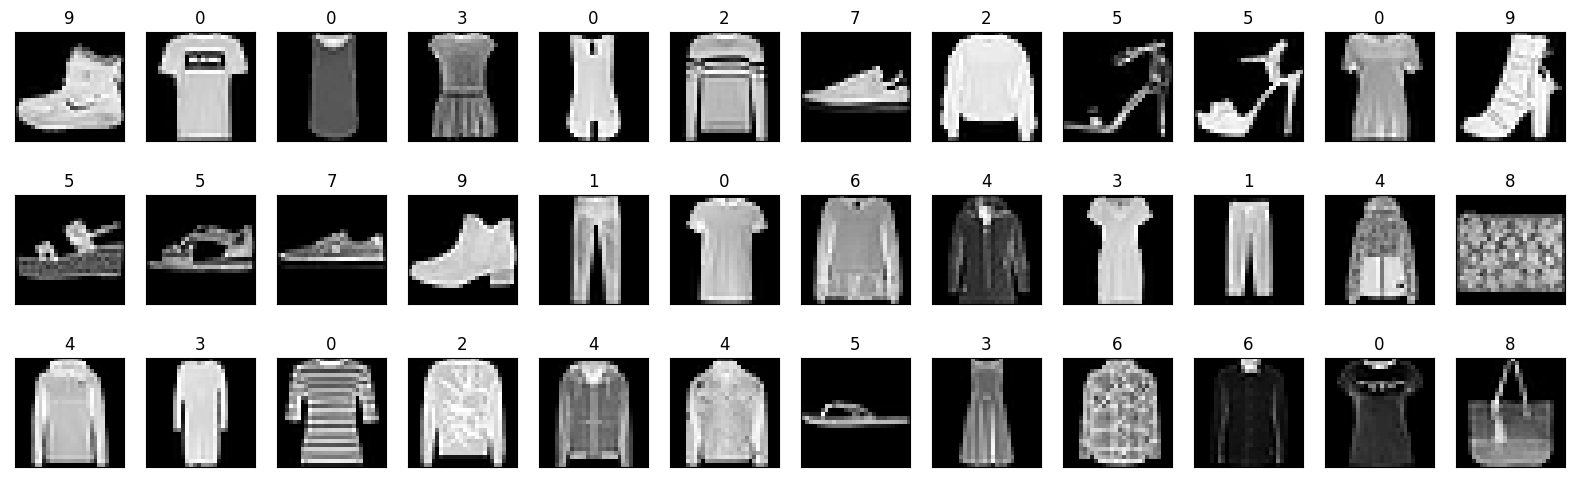

In [14]:
# Show a random image plot
fig = plt.figure(figsize=(20, 6))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
    

In [15]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5005 - accuracy: 0.8233 - val_loss: 0.4388 - val_accuracy: 0.8410
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.8632 - val_loss: 0.3766 - val_accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.8777 - val_loss: 0.3715 - val_accuracy: 0.8659
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3118 - accuracy: 0.8847 - val_loss: 0.3582 - val_accuracy: 0.8711
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2935 - accuracy: 0.8919 - val_loss: 0.3557 - val_accuracy: 0.8726
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8972 - val_loss: 0.3524 - val_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.8996 - val_loss: 0.3483 - val_accuracy:

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 938us/step - loss: 0.3288 - accuracy: 0.8855


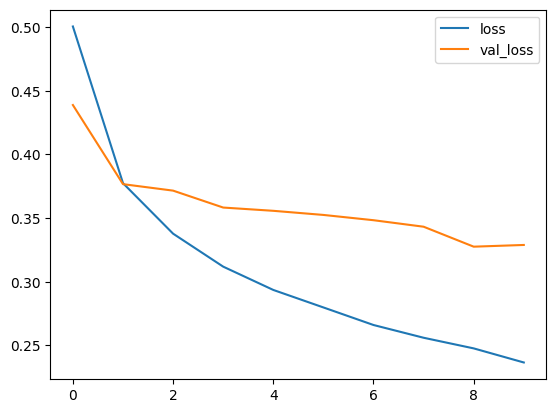

In [21]:
# Figure of the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

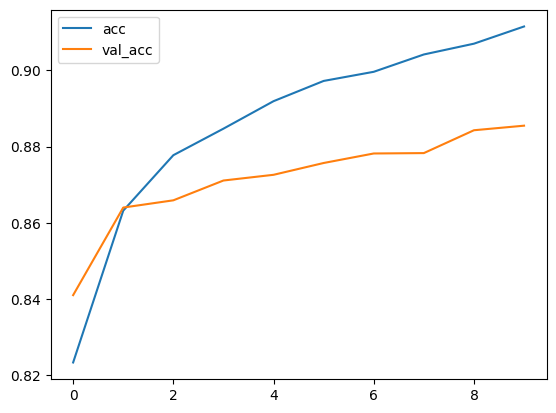

In [22]:
# Figure of the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [55]:
# Predict the model
predictions = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 763us/step


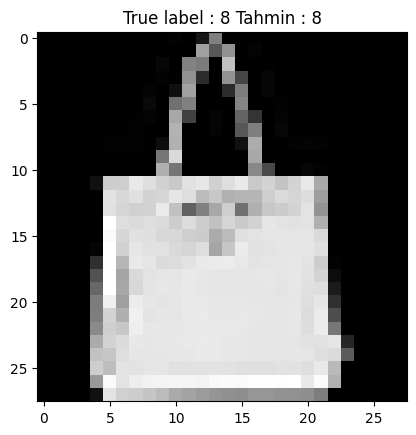

In [96]:
# Show a random image plot
i = random.randint(0, len(X_test))
plt.imshow(X_test[i], cmap='gray')
plt.title('True label : %s Tahmin : %s' % (y_test[i], predictions[i]));